In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.set_cmap('coolwarm')

In [12]:
n =1000
cats = 3
dims = 2

x = []
y = []

for i in range(cats):
    x.append(np.random.randn(n, dims) + np.random.randn(dims)*5)
    y.append(np.array([np.arange(cats)] * n) ==i)

x = np.vstack(x)   
y = np.vstack(y)   
    

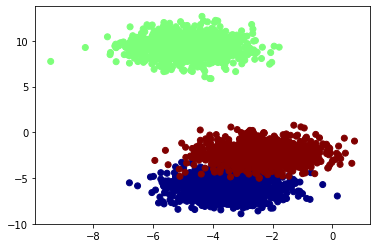

In [13]:
plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis =1), cmap ='jet' )


In [14]:
def SoftMax(z):
    return np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims=True)
    
    
    

In [15]:
class MultipleLogisticRegression:
    def __init__(self, shape_in, shape_out):
        self.weights = np.random.rand(shape_in, shape_out)
        self.bias    = np.random.randn(1, shape_out)
        
        
    def Fit(self, x, y, learn_rate = 1, iterations = 1000 ):    
        losses = []
        for i in range(iterations):
            #y_hat = x @ weights + bias
            #p_hat = Sigmoid(y_hat)
            p_hat = self.Predict(x)

            loss  = -np.sum(y* np.log(p_hat + 1e-99))
            losses.append(loss)


            self.weights -= learn_rate* x.T @ (p_hat - y)  #p_hat = sigmoid(y) and @ is matrix multiply
            self.bias    -= learn_rate* np.sum(p_hat - y, axis = 0)

        plt.plot(losses)    
    
    def BatchFit(self, batch_x, batch_y, learn_rate = 1e-3):
        p_hat = self.Predict(batch_x)
        loss  = -np.sum(batch_y* np.log(p_hat + 1e-99))
        losses.append(loss)
        self.weights -= learn_rate* batch_x.T @ (p_hat - batch_y)  #p_hat = sigmoid(y) and @ is matrix multiply
        self.bias    -= learn_rate* np.sum(p_hat - batch_y, axis = 0)
        return loss
        
        
    def Predict(self, x):
        y_hat = x @ self.weights + self.bias
        p_hat = SoftMax(y_hat)
        return p_hat
        

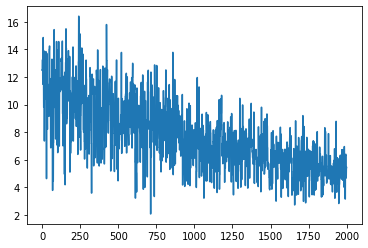

In [16]:

iterations = 1000
losses=[]
indices = np.arange(x.shape[0])

model = MultipleLogisticRegression(dims, cats)
for i in range(iterations):
    ind = np.random.choice(indices, size=5)
    batch_x = x[ind]
    batch_y = y[ind]
    losses.append(model.BatchFit(batch_x, batch_y, learn_rate = 1e-5))
plt.plot(losses)


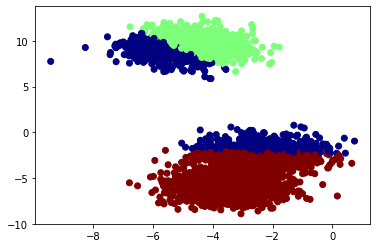

In [17]:
p_hat = model.Predict(x)
p_hat
plt.show()
plt.scatter(x[:,0], x[:,1], c=np.argmax(p_hat, axis = 1), cmap = 'jet')